# Step 1: Data cleaning and formatting

Data collected is messy which means we need to clean and arrange it into an acceptable format before we can even start the analysis. Data cleaning is necessary part of most actual data science problems.

In [2]:
# data exploration and visualization

import pandas as pd 
import numpy as np 

import os
import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams["font.size"]=24

import seaborn as sns

sns.set(font_scale=2)

from IPython.core.pylabtools import figsize
#Ignore all the warnings        
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read in train and test data into a dataframe 

train = pd.read_csv("train.csv")
test = pd.read_csv("testH.csv")

#checking the size of the train and test data

print(train.shape)
print(test.shape)

(1168, 81)
(1459, 80)


In [4]:
# display the content of the train data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


This is a subset of the full data which contains 81 columns. Already, we can see a couple issues: first, we know that we want to predict the SalePrice. We tried to study all the columns and predict the columns which plays a major weight in the prediction of the sales price.

In [5]:
#give the details information of the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

We can see the number of the missing terms in respective columns and also the the types of the datatypes for each columns. This helps to some idea related to the missing values and the datatyps for further analysis.

In [6]:
# display the content of the test data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


This is a subset of the full data which contains 80 columns as it is a test that. it donot consist of the target columns. We can see a couple issues: first, we know that we want to predict the SalePrice of the test database which the train model. We have to test the test data at the end to check its accuracy and need to do all the modification of the test data as we do in train data.

In [7]:
#give the details information of the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Missing Values:

We can look at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

Below we create a function that calculates the number of missing values and the percentage of the total values that are missing for each column.

In [8]:
#Missing value findind functions
def mis_val(df):
    mis_val_sum = df.isnull().sum()
    percent_mis = mis_val_sum * 100 / len(df)
    table = pd.concat([mis_val_sum,percent_mis], axis=1)
    table = table.rename(columns={0:"missing values", 1:"percent of missing value"})
    table = table[table["missing values"]!=0].sort_values("percent of missing value", ascending =False).round(1)
    print("dataframe has", df.shape[1],"columns.\n", table.shape[0],"have missing values")
    return table

In [9]:
#Calling a function which calculates the missing values
table_train = mis_val(train)

# Dispalying the missing values along with its percentages
table_train

dataframe has 81 columns.
 18 have missing values


,missing values,percent of missing value
PoolQC,1161,99.4
MiscFeature,1124,96.2
Alley,1091,93.4
Fence,931,79.7
FireplaceQu,551,47.2
LotFrontage,214,18.3
GarageType,64,5.5
GarageYrBlt,64,5.5
GarageFinish,64,5.5
GarageQual,64,5.5


we must be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use.

What columns to retain may be a little arbitrary (here is a discussion), but for this project, we will remove any columns with more than 40% missing values.

In [10]:
#calling the function to calculate the missing values in the test set
table_test = mis_val(test)
table_test

dataframe has 80 columns.
 33 have missing values


,missing values,percent of missing value
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


For this project, we will remove any columns with more than 40% missing values.

We have to drop the columns from the both train and the test set

In [11]:
#listing all the columns from the train and test set whose missing percentage is more than 40%

missing_train = list(table_train[table_train["percent of missing value"]>40].index)
missing_test = list(table_test[table_test["percent of missing value"]>40].index)

In [12]:
# Checking the shape and size of the train and test dataframe
print(train.shape)
print(test.shape)

(1168, 81)
(1459, 80)


# Step:2-Exploratory Data Analysis

Exploratory Data Analysis is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships.In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.

To begin the EDA, we will focus on a single variable, the Energy Star Score, because this is the target for our machine learning models. We can rename the column to score for simplicity and then start exploring this value.

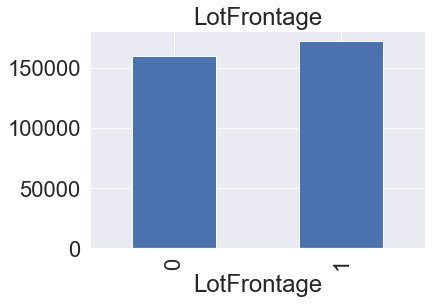

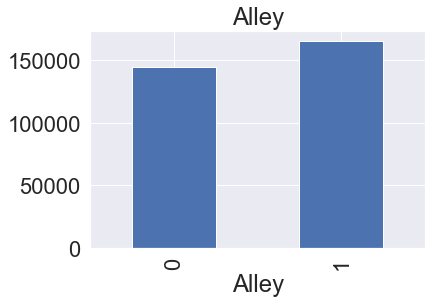

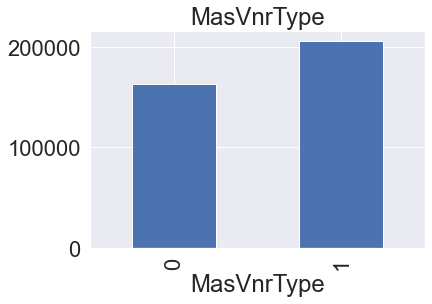

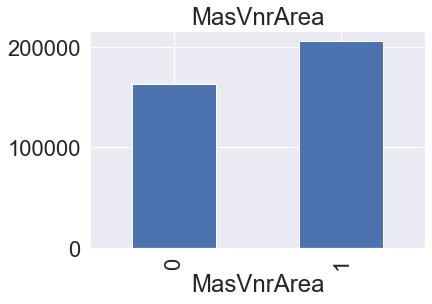

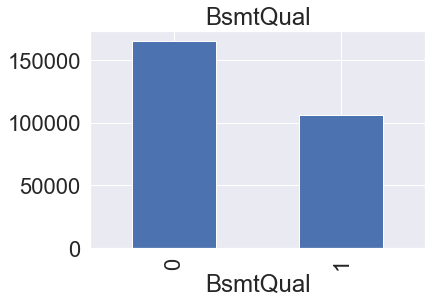

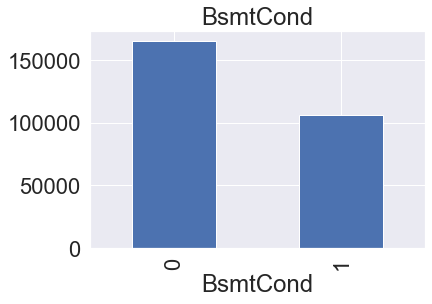

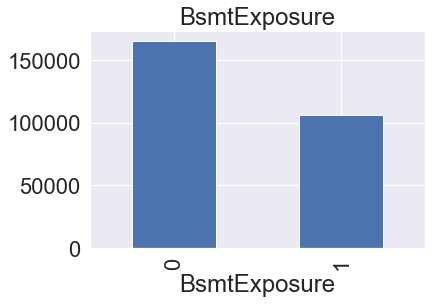

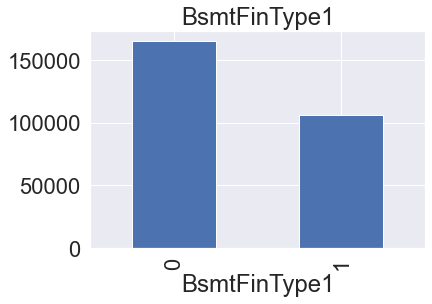

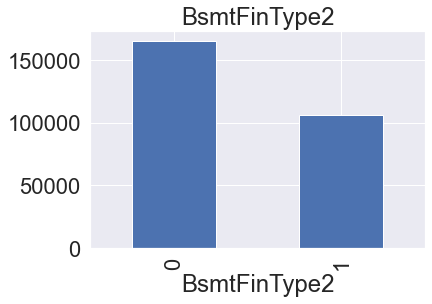

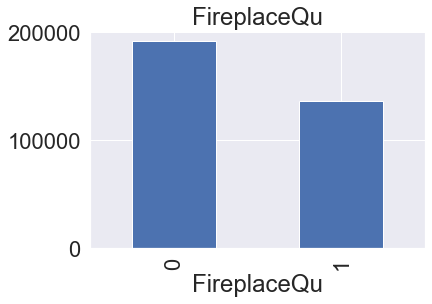

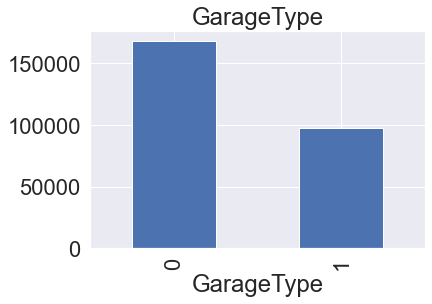

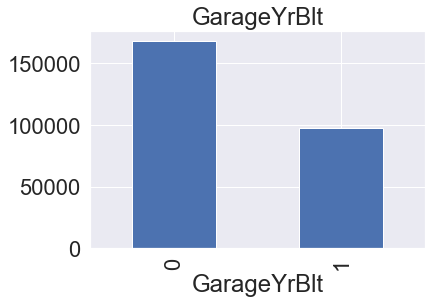

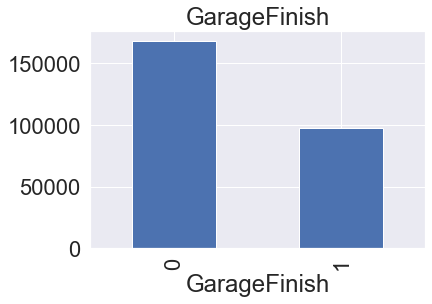

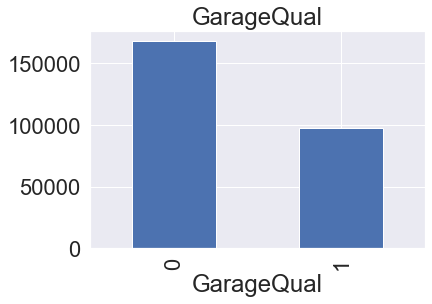

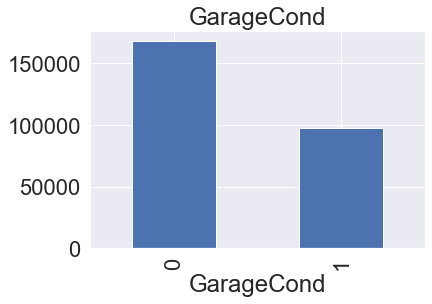

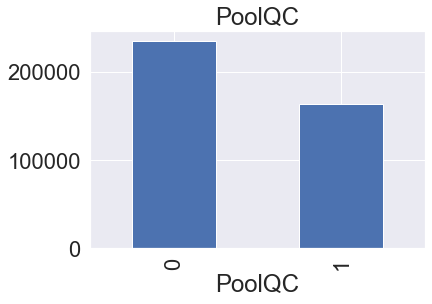

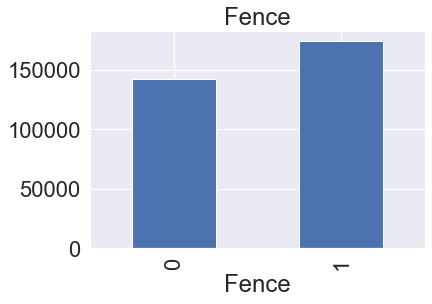

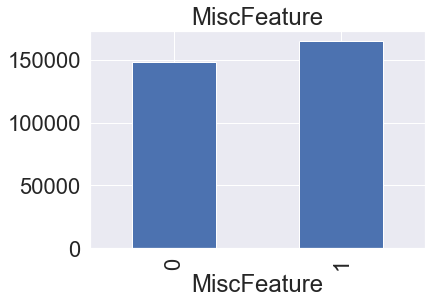

In [13]:
# Checkinng all the missing values from the each columns and plot in a graph

features_with_na = [features for features in train.columns if train[features].isnull().sum()>1]

for features in features_with_na:
    data=train.copy()
    
    #lets make a variable that indicates 1 if the observation was missing or zero
    data[features] = np.where(data[features].isnull(),1,0)
    #lets calculate the mean salesprice where the information is missing
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

In [14]:
#checking all the numerical colums present in the dataframe

numerical_features = [features for features in train.columns if train[features].dtypes != 'O']
print("Number of numeric variables: ",len(numerical_features))
train[numerical_features].head()

Number of numeric variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,240,0,0,0,0,0,0,6,2009,215000


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Text(0.5, 1.0, 'House Price vs YearSold')

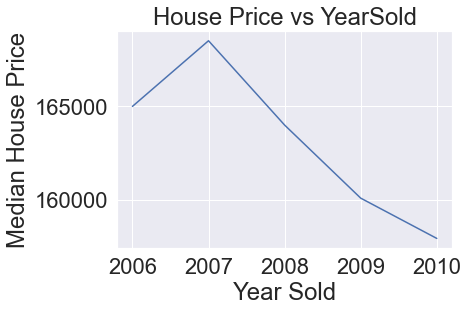

In [15]:
#checking the columns which contains year information to predict their impacts

year_features = [features for features in numerical_features if 'Yr' in features or 'Year' in features]
print(year_features)
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')

From the above graph we can see that there is a impact of the year on the price of  the house.

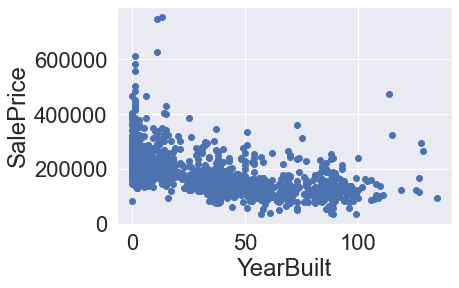

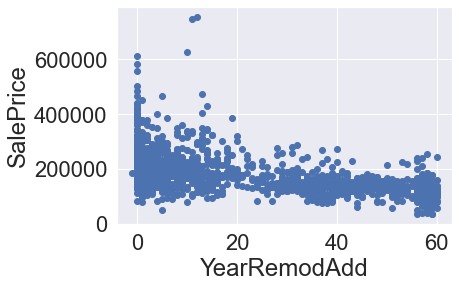

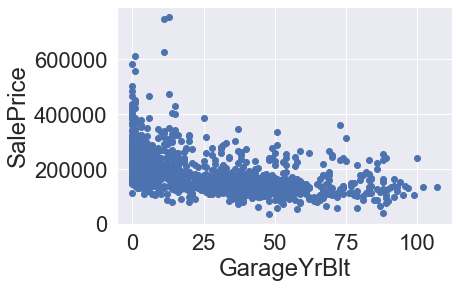

In [16]:
# We can also use scatter plot to check the SalePrice based on the columns which is based on the year
for features in year_features:
    
    if features != 'YrSold':
        data=train.copy()
        
        data[features]=data['YrSold'] - data[features]
        
        plt.scatter(data[features],data['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()

We will go for the discrete data present in the dataframe. We will analyse the data and based on the analysis we will try to predict the best attributes which contribute most to predict our SalesPrice.

In [17]:
discrete_features = [features for features in numerical_features if len(train[features].unique())<25 and features not in year_features+['Id']]
print("Discrete Varibales Count: {}".format(len(discrete_features)))

Discrete Varibales Count: 17


In [18]:
# Displaying the list of of the discrete columns present in the dataframe.
print(discrete_features)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [19]:
# Visualizing the data of the  discrete set
train[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6


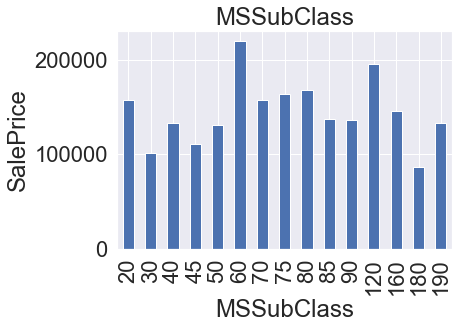

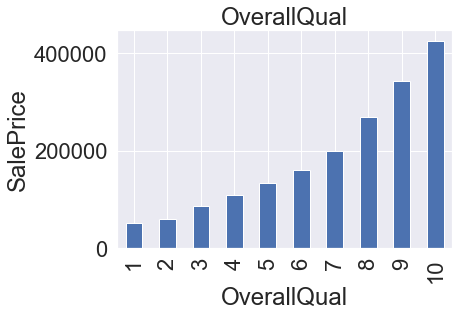

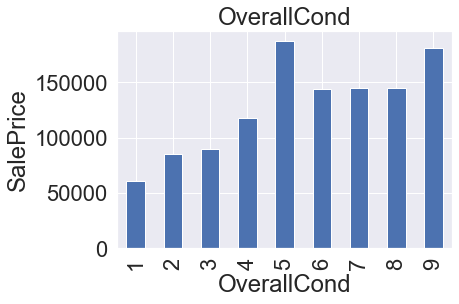

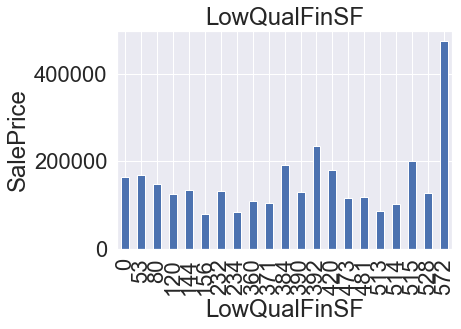

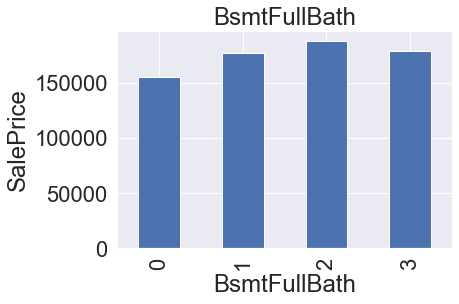

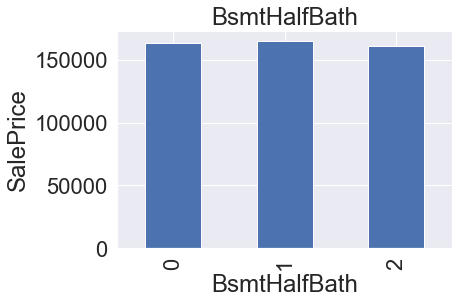

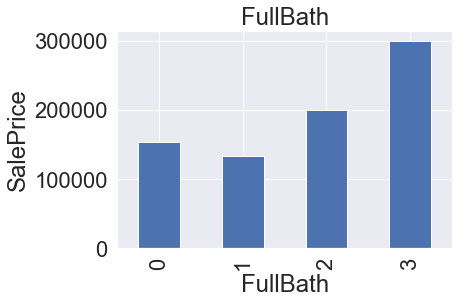

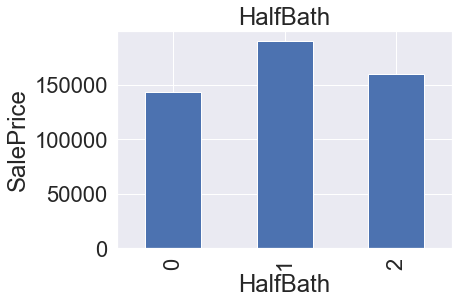

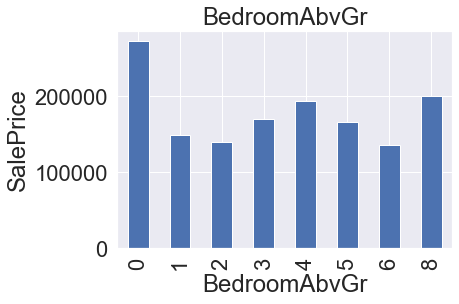

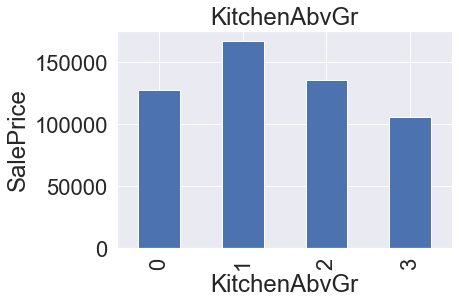

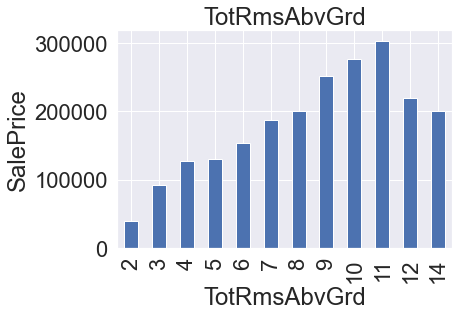

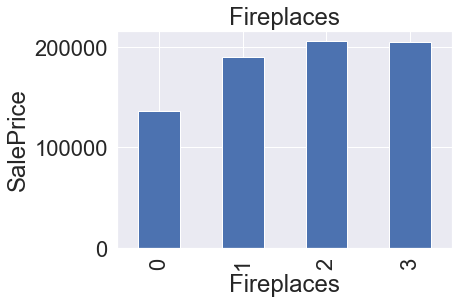

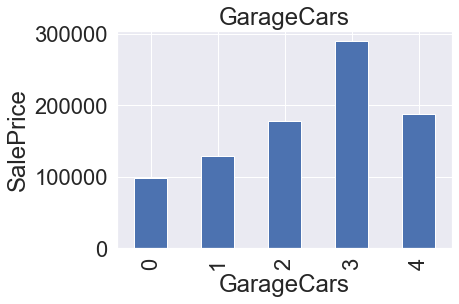

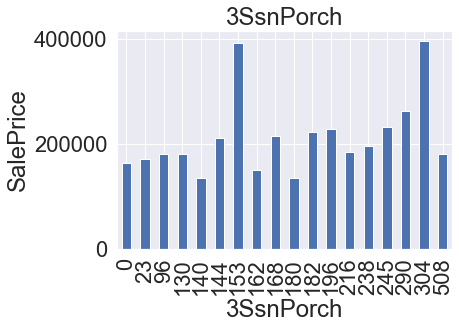

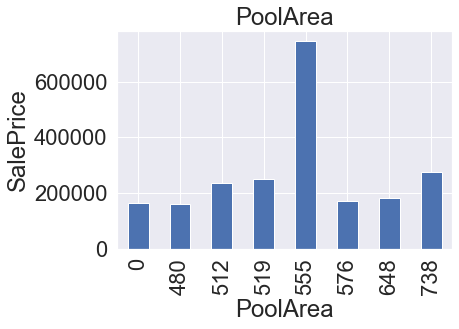

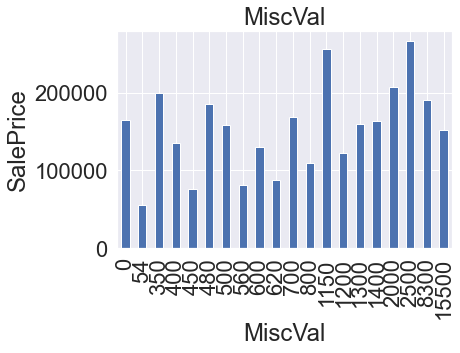

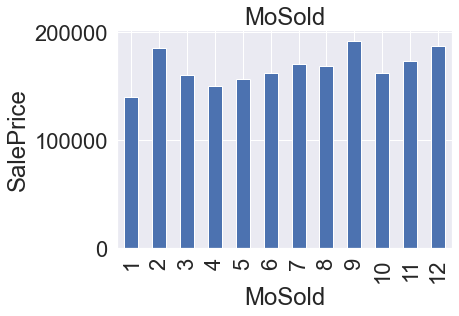

In [20]:
# Plotting the bar graph of all the discret columns present in our dataframe.

for features in discrete_features:
    data = train.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(features)
    plt.show()  

In [21]:
# Now we will look for the continous data in the dataframe and display the continous data
continous_feature = [features for features in numerical_features if features not in discrete_features+year_features+['Id']]
print("Continous feature count {}".format(len(continous_feature)))

Continous feature count 16


In [21]:
#displaying the continous data
print(continous_feature)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


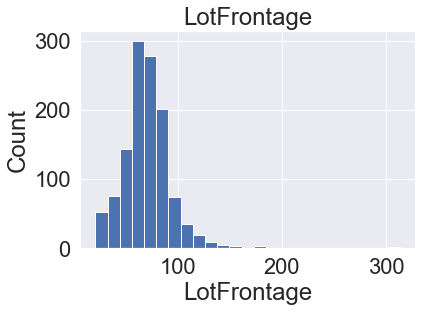

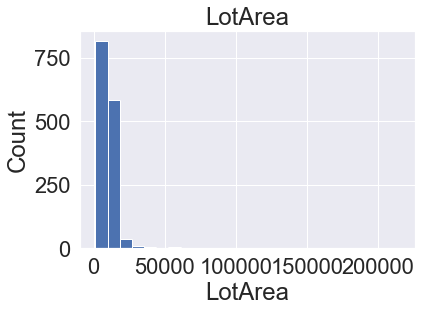

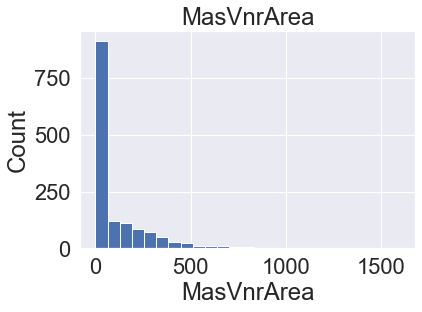

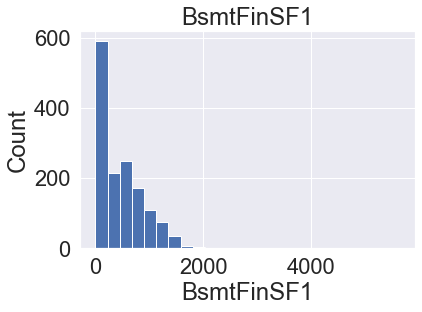

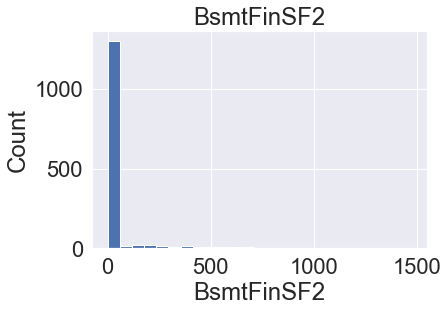

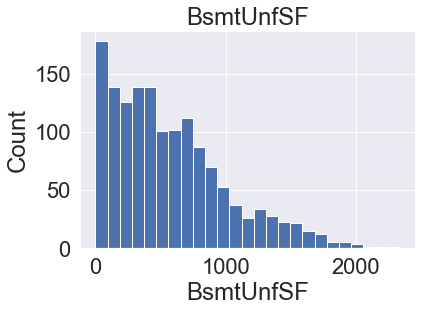

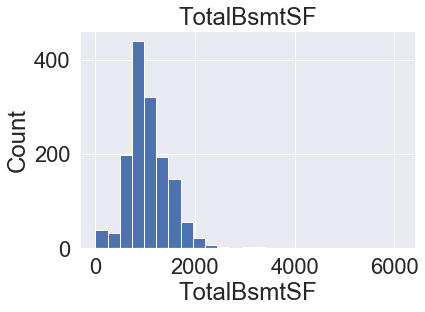

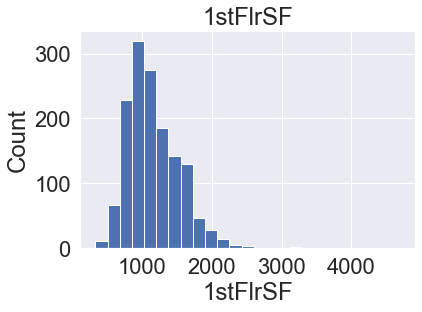

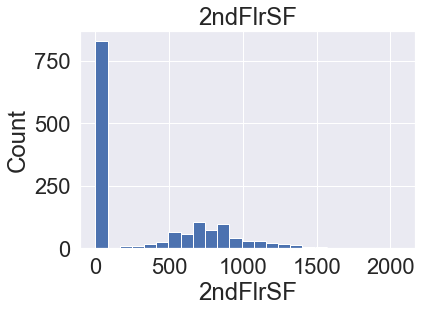

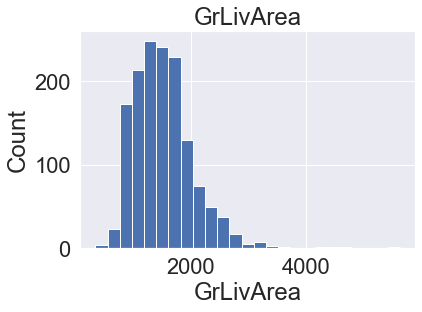

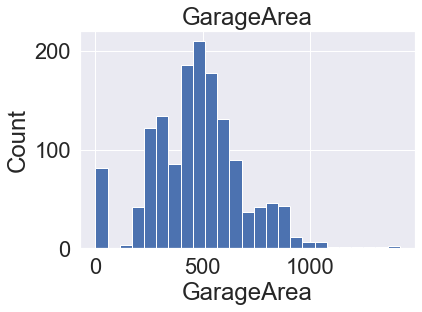

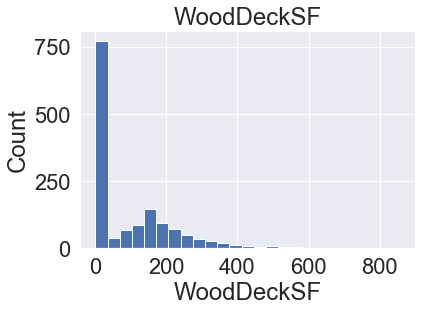

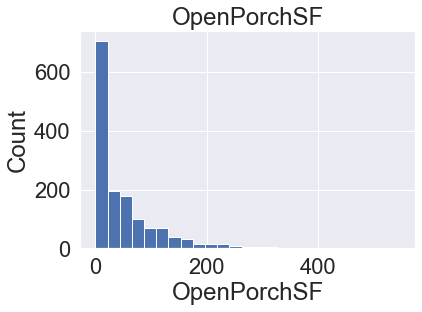

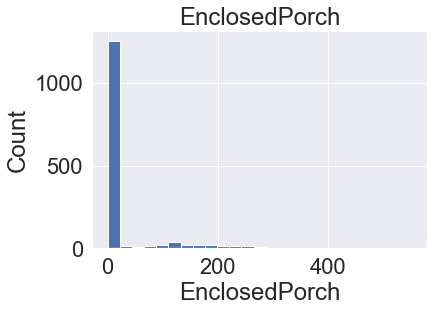

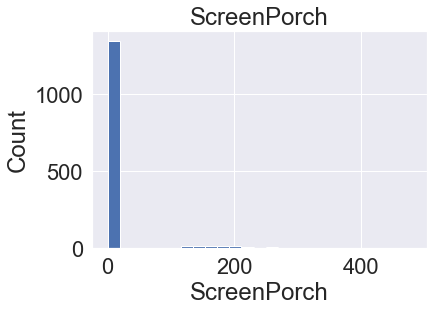

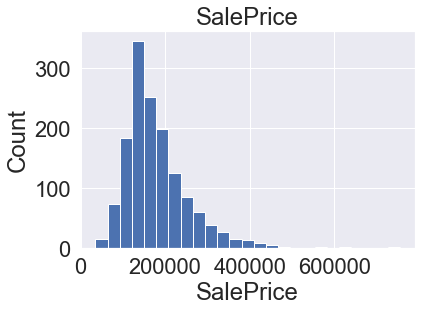

In [22]:
#displaying the histogram plot of the continous data

for features in continous_feature:
    data = train.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.title(features)
    plt.show()

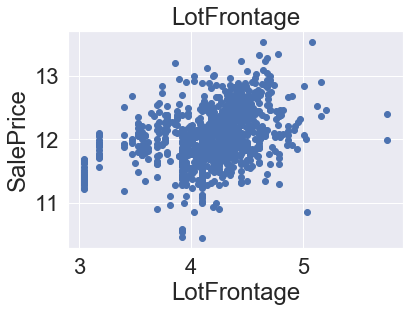

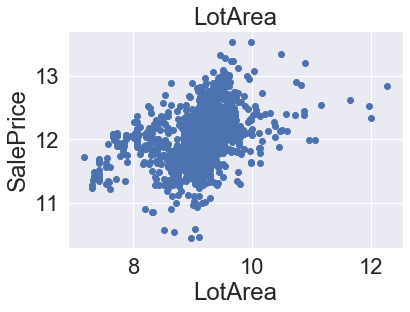

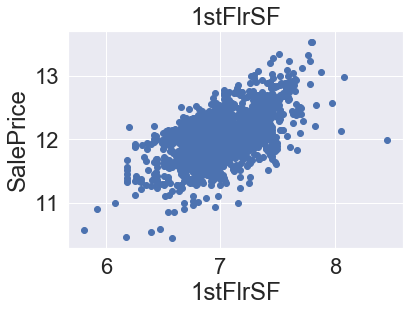

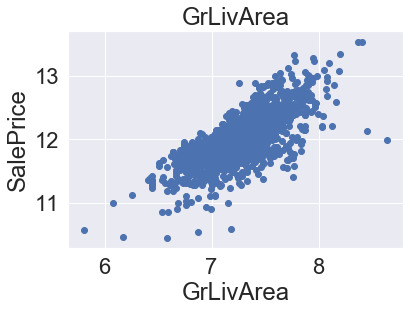

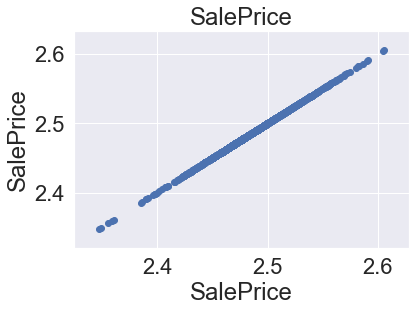

In [23]:
# We can see and analyze the data using scatter plot for the continous data.

for features in continous_feature:
    data = train.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data['SalePrice'] = np .log(data['SalePrice'])
        plt.scatter(data[features],data['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.title(features)
        plt.show()

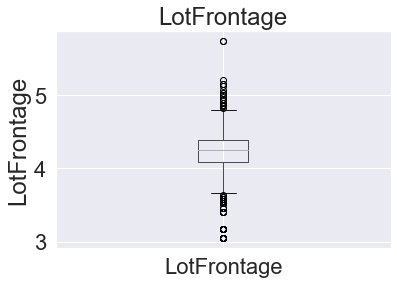

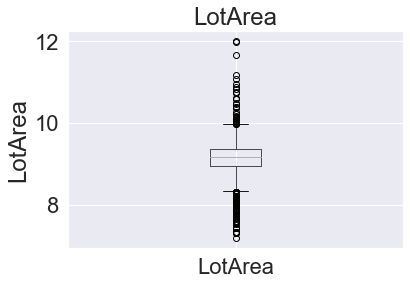

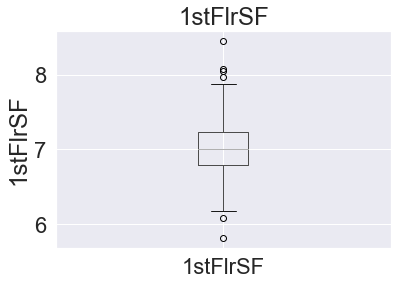

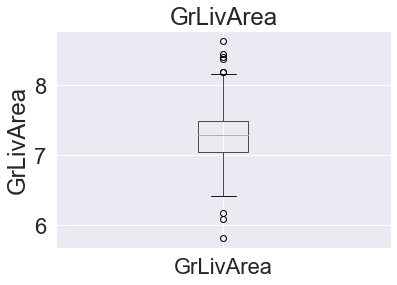

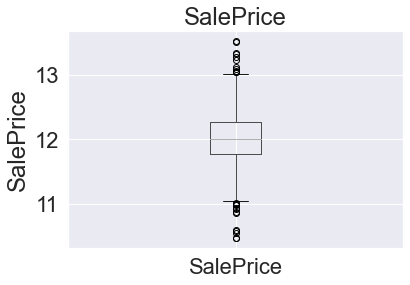

In [22]:
# We can see plot the boxplot to see the outliers in the continous features of the dataset

for features in continous_feature:
    data = train.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data.boxplot(column=features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

In [23]:
print(train.shape)
print(test.shape)

(1168, 81)
(1459, 80)


In [24]:
#categorical variables:
categorical_features = [features for features in train.columns if data[features].dtypes == 'O']

In [25]:
print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [26]:
train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [27]:
# checking the unique value in each of the columns of the categorical variables
for features in categorical_features:
    print("The feature is {} and the number of categories are {}".format(features,len(train[features].unique())))
    print("The feature is {} and the number of categories are {}".format(features,len(test[features].unique())))
    print("...............................................")

The feature is MSZoning and the number of categories are 5
The feature is MSZoning and the number of categories are 6
...............................................
The feature is Street and the number of categories are 2
The feature is Street and the number of categories are 2
...............................................
The feature is Alley and the number of categories are 3
The feature is Alley and the number of categories are 3
...............................................
The feature is LotShape and the number of categories are 4
The feature is LotShape and the number of categories are 4
...............................................
The feature is LandContour and the number of categories are 4
The feature is LandContour and the number of categories are 4
...............................................
The feature is Utilities and the number of categories are 1
The feature is Utilities and the number of categories are 2
...............................................
The fe

In [28]:
["Exterior2nd","Foundation","Neighborhood","GarageType","RoofStyle","Street","SaleCondition","PavedDrive",
 "LandContour","GarageFinish"]

['Exterior2nd',
 'Foundation',
 'Neighborhood',
 'GarageType',
 'RoofStyle',
 'Street',
 'SaleCondition',
 'PavedDrive',
 'LandContour',
 'GarageFinish']

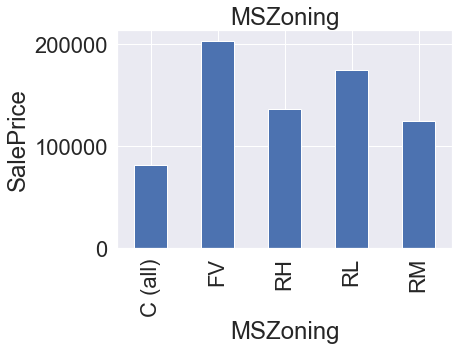

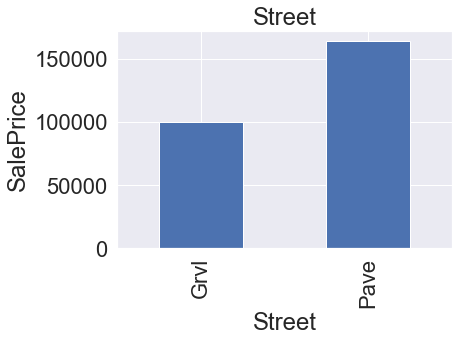

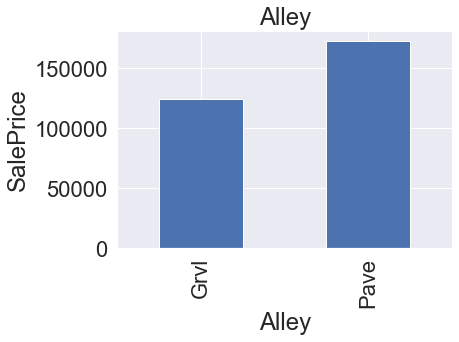

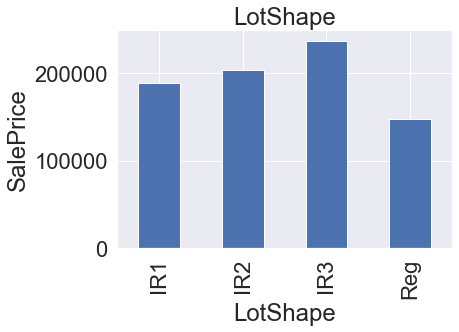

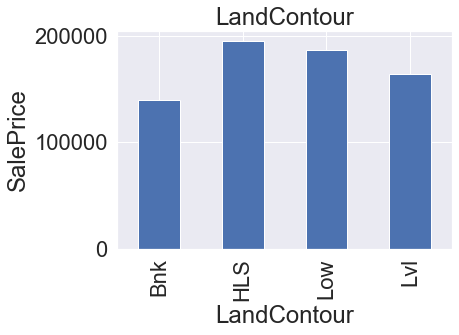

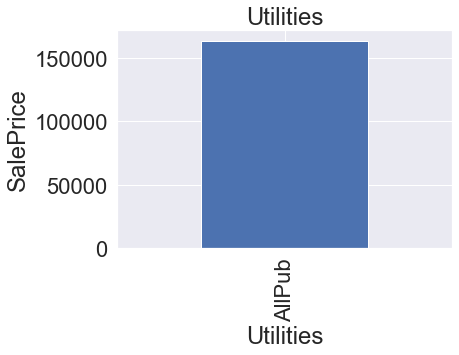

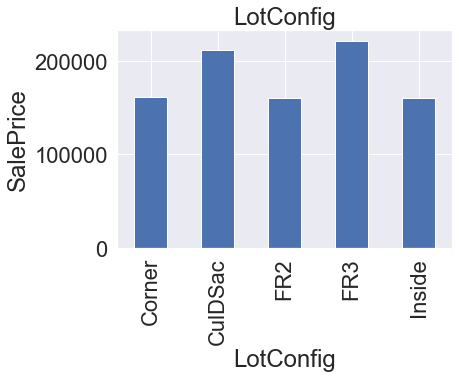

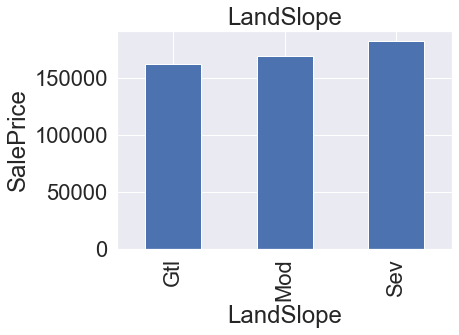

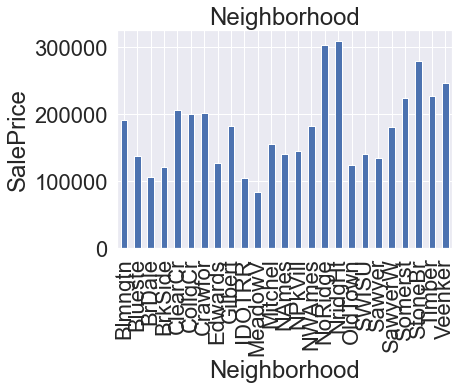

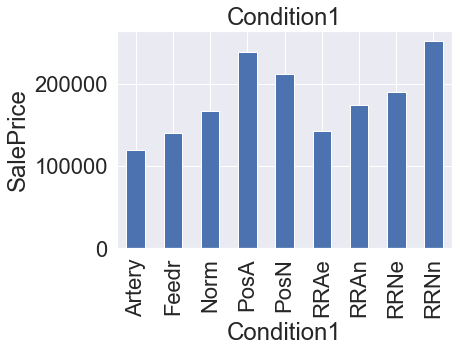

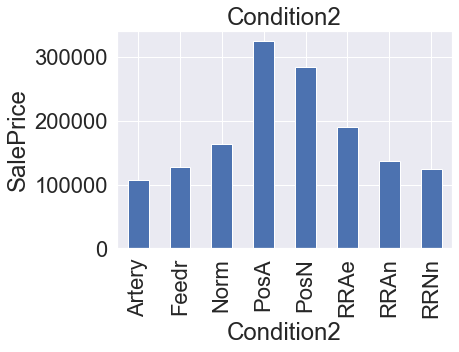

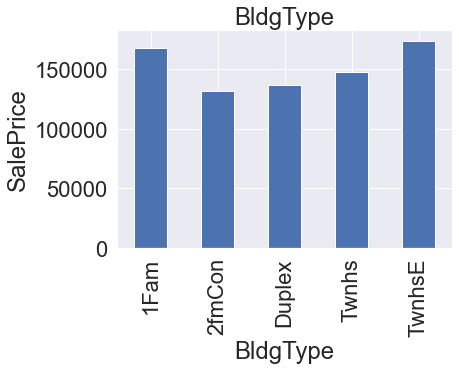

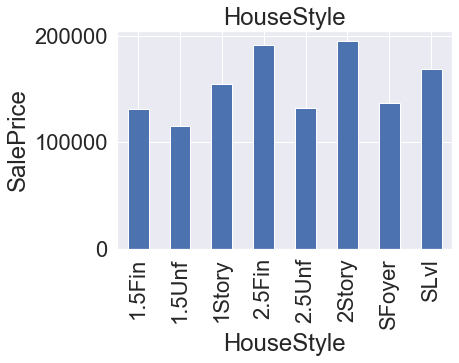

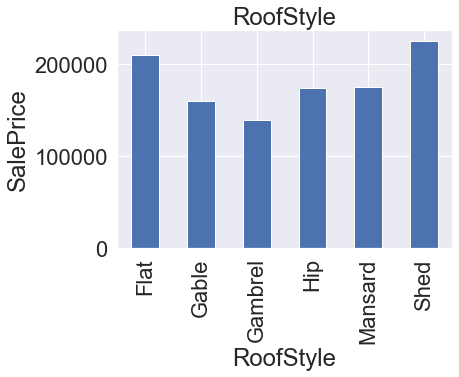

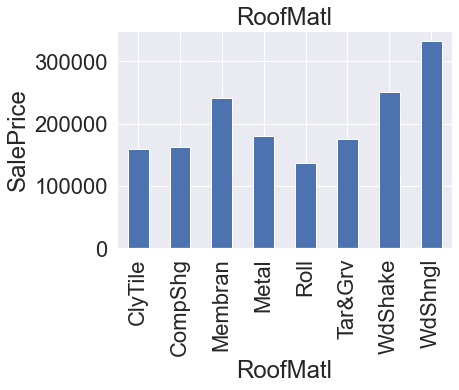

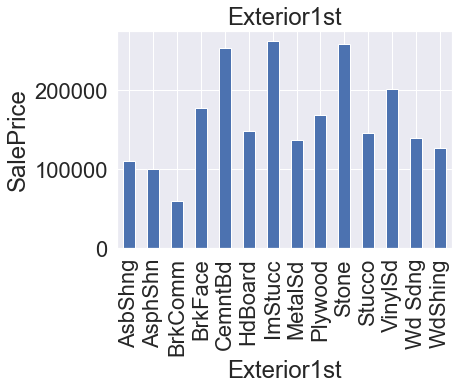

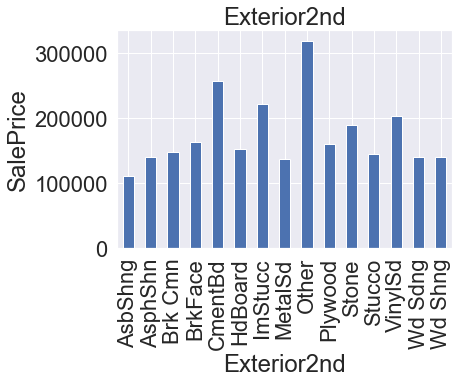

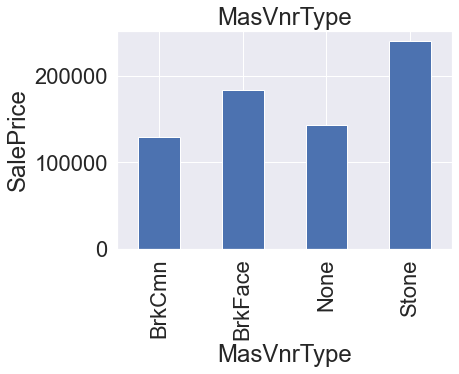

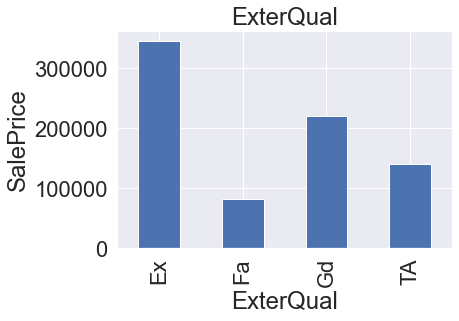

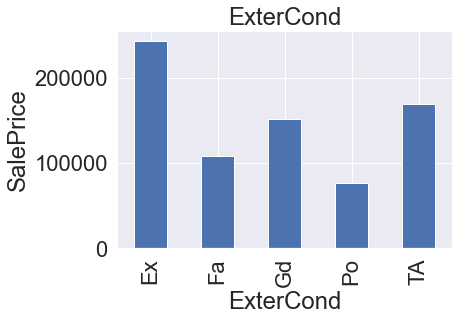

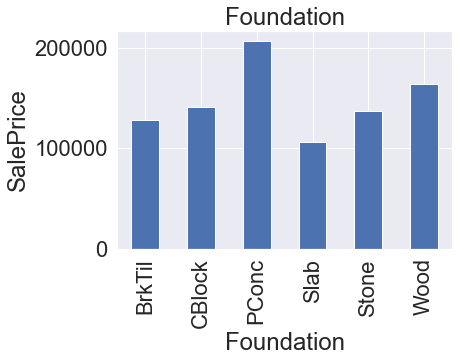

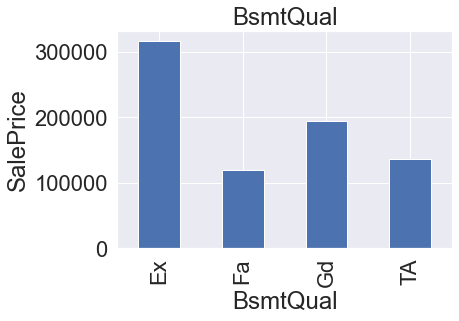

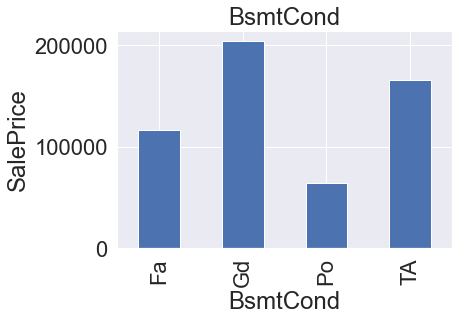

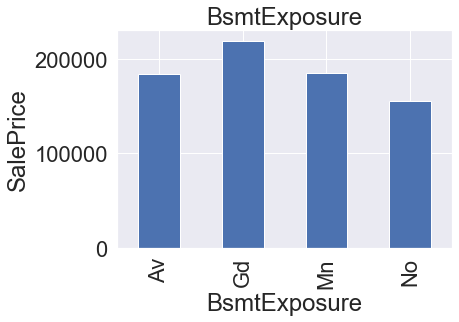

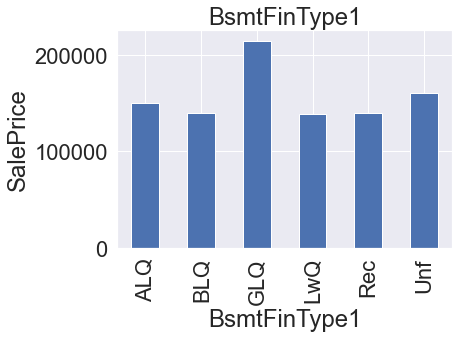

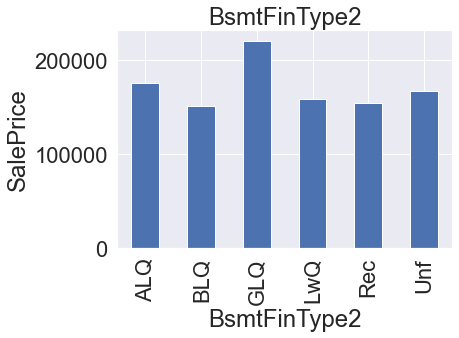

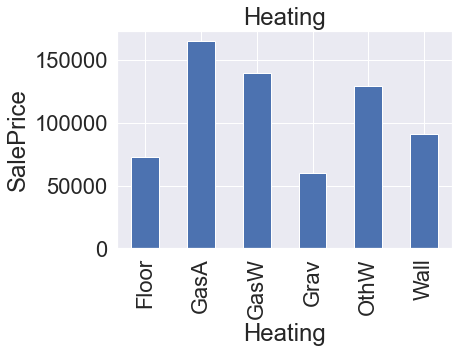

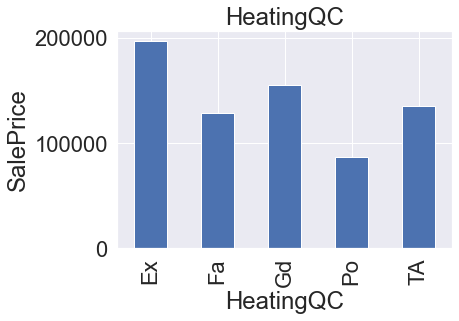

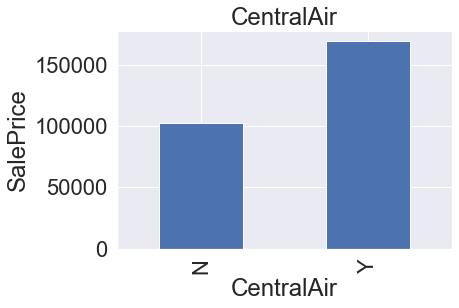

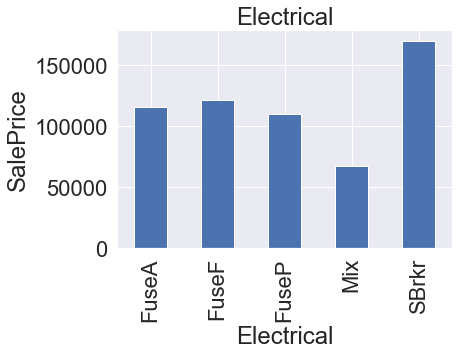

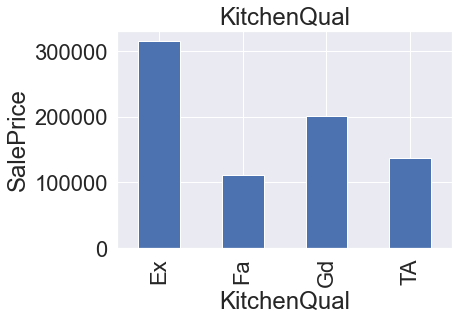

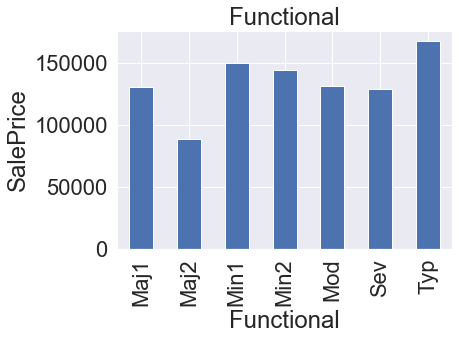

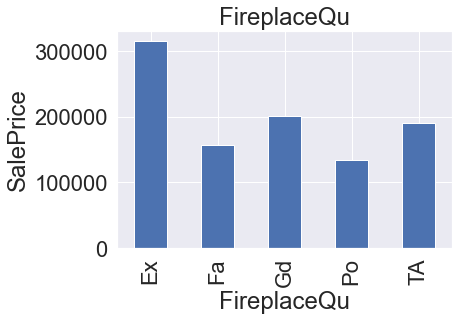

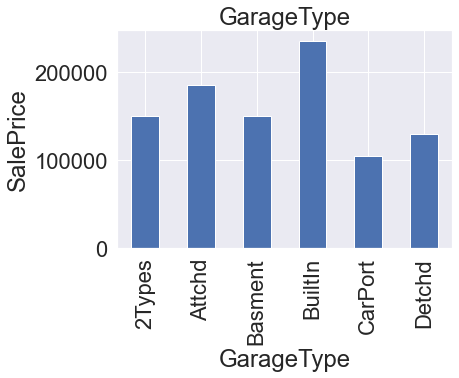

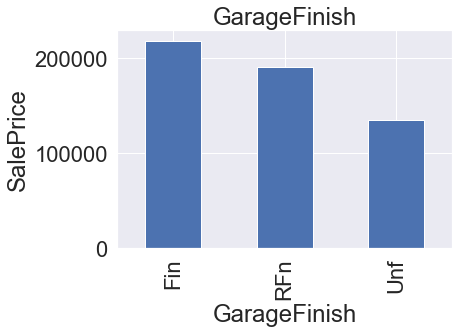

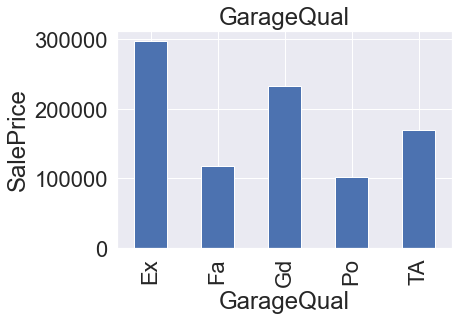

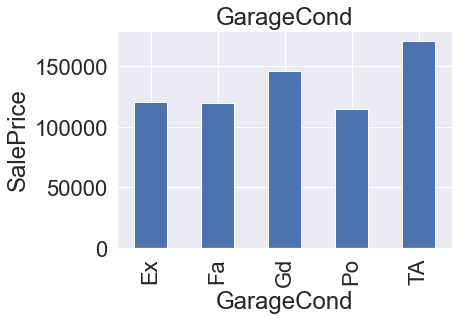

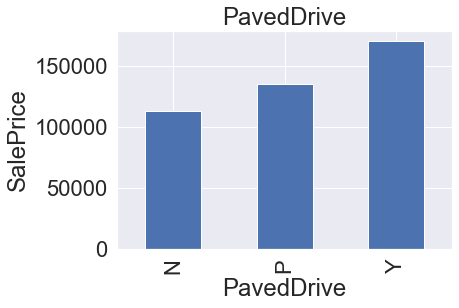

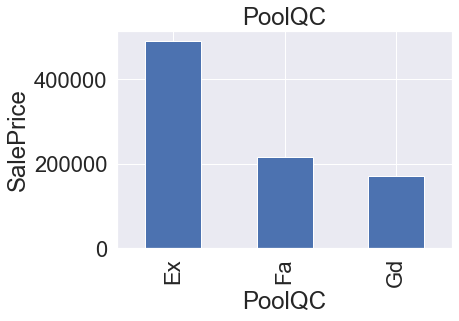

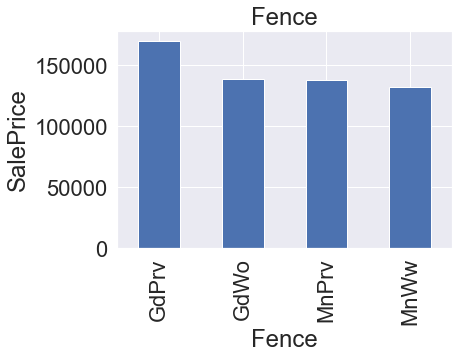

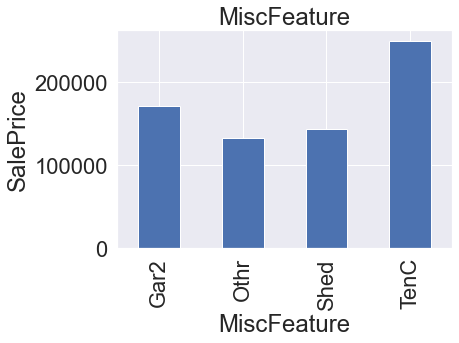

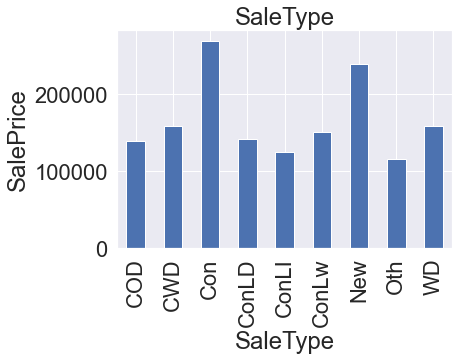

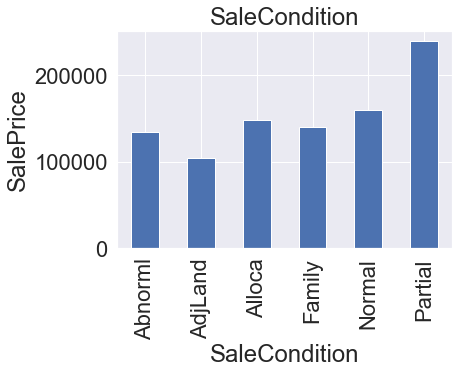

In [29]:
# ploting the bar plot of the categorical varibale and analyse the impact of the certian columns on the target.
for features in categorical_features:
    data  = train.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(features)
    plt.show()

Lets check the data of the target colums to analyze it properly.
We make a histogram plot to analyze the data.

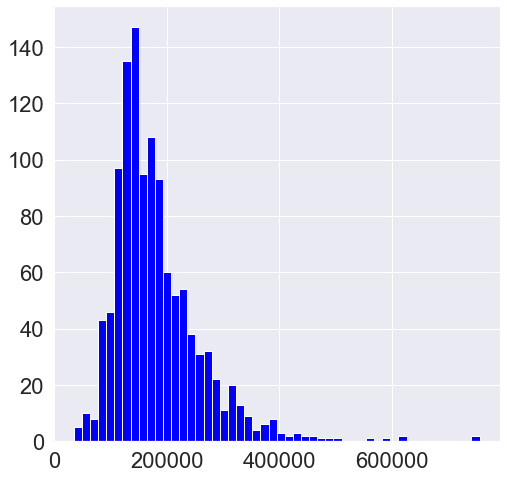

In [30]:
figsize(8,8)

plt.hist(train["SalePrice"], bins =50, color="blue")
plt.show()

Clearing the least important columns:

In [31]:
#dropping all the colums whose missing percentage is more that 40%

train_new = train.drop(columns= missing_train, axis=1)
test_new = test.drop(columns = missing_test, axis=1)

print(train_new.shape)
print(test_new.shape)

(1168, 76)
(1459, 75)


In [32]:
# checking the sales type colums and plotting the diagram which contains more than 5.
saletypes = train_new["SaleType"].value_counts()
saletypes = list(saletypes[saletypes.values>5].index)
saletypes

['WD', 'New', 'COD', 'ConLD']

In [33]:
train_new["SaleCondition"].describe()

count       1168
unique         6
top       Normal
freq         945
Name: SaleCondition, dtype: object

In [34]:
salecond = train_new["SaleCondition"].value_counts()
salecond = list(salecond[salecond.values>12].index)
salecond

['Normal', 'Partial', 'Abnorml', 'Family']

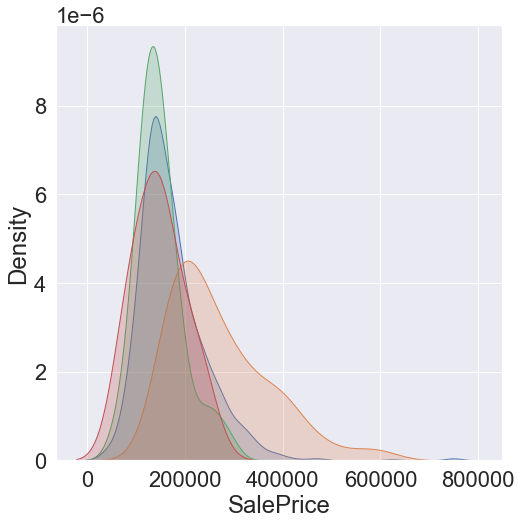

In [35]:
figsize(8,8)

for s in saletypes:
    subset = train_new[train_new["SaleType"]==s]
    sns.kdeplot(subset["SalePrice"].dropna(), shade= True, label=s)

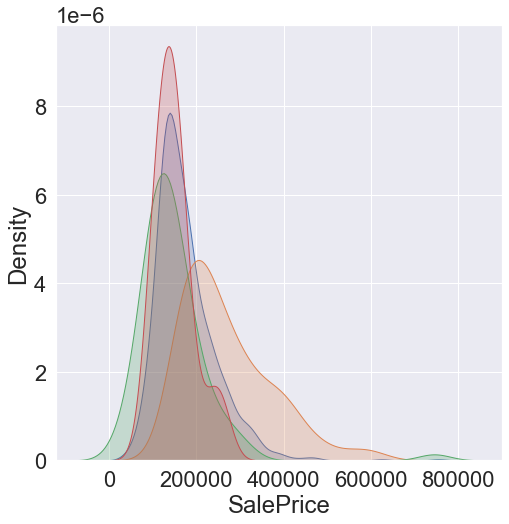

In [36]:
figsize(8,8)

for sc in salecond:
    subset = train_new[train_new["SaleCondition"]==sc]
    sns.kdeplot(subset["SalePrice"].dropna(), shade=True, label=sc)

In [37]:
ntypes = train_new["Neighborhood"].value_counts()
ntypes = list(ntypes[ntypes.values>87].index)
ntypes

['NAmes', 'CollgCr']

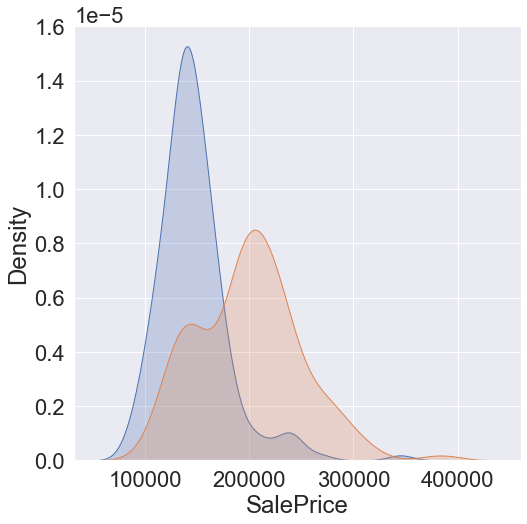

In [38]:
for n in ntypes:
    subset = train_new[train_new["Neighborhood"]==n]
    sns.kdeplot(subset["SalePrice"].dropna(), shade=True, label=n)

In [39]:
street = train_new["Street"].value_counts()
street = list(street.index)

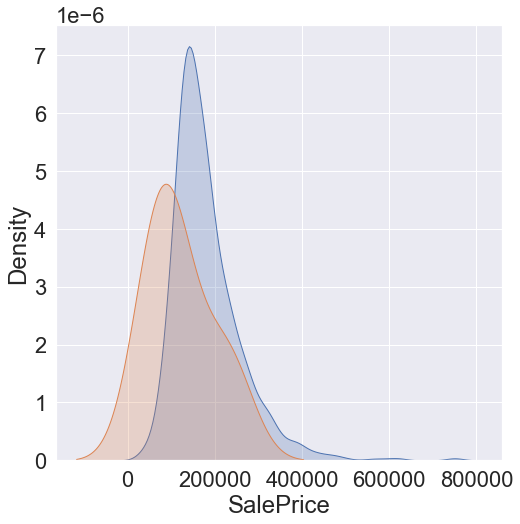

In [40]:
for s in street:
    subset = train[ train_new["Street"] == s]
    sns.kdeplot(subset["SalePrice"].dropna(), shade=True,label=s)

In [41]:
correlations = train_new.corr()
correlations["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePr

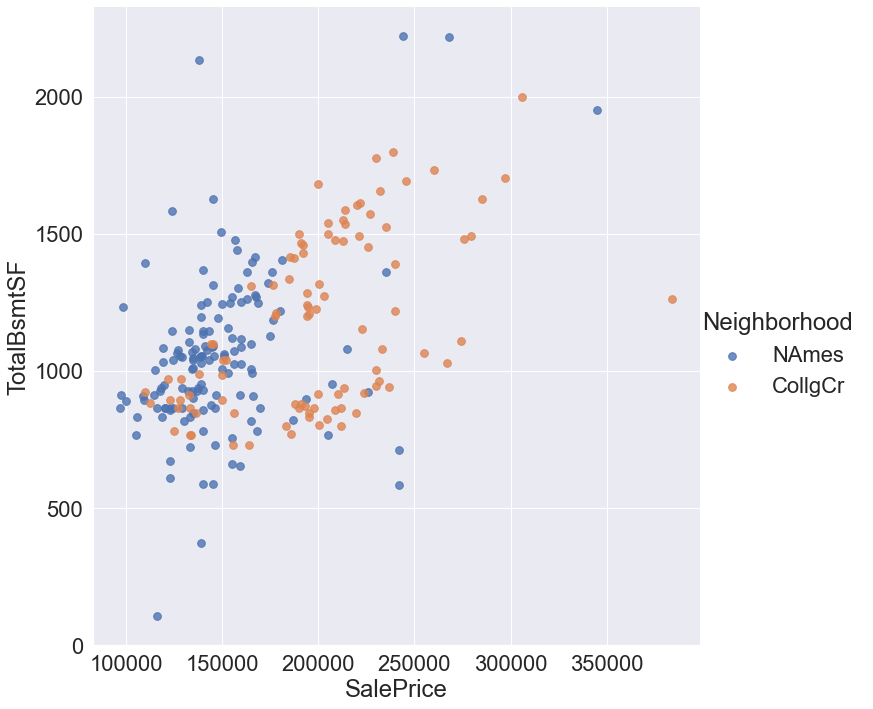

In [42]:
figsize(8,8)
data = train_new[train_new["Neighborhood"].isin(ntypes)]
sns.lmplot(x="SalePrice", y="TotalBsmtSF", hue="Neighborhood", data = data.dropna(), 
           scatter_kws={"alpha":0.8,"s":60}, size=10, fit_reg=False)
plt.show()

# Step3: Feature Selection and Engineering

Feature engineering and selection are iterative processes that will usually require several attempts to get right. Often we will use the results of modeling, such as the feature importances from a random forest, to go back and redo feature selection, or we might later discover relationships that necessitate creating new variables. Moreover, these processes usually incorporate a mixture of domain knowledge and statistical qualitites of the data.

In [43]:
def corr_fun(df):
    df.dropna()
    numeric = df.select_dtypes("number")
    num_cols = list(numeric.columns)
    for col in num_cols:
        if col == "SalePrice":
            continue
        else:
            numeric["sqrt_"+col] = np.sqrt(numeric[col])
            numeric["log_"+col] = np.log(numeric[col])
    cat_cols = ["Foundation","Neighborhood","GarageType","RoofStyle","Street","SaleCondition","PavedDrive","LandContour","GarageFinish"]
    dummies = pd.get_dummies(df[cat_cols])
    features = pd.concat([numeric,dummies], axis=1)
    corr_ = features.corr()["SalePrice"].sort_values(ascending=False)
    return corr_        

In [44]:
correlations = corr_fun(train_new)

In [45]:
correlations.head(15)

SalePrice           1.000000
OverallQual         0.789185
sqrt_OverallQual    0.764969
log_OverallQual     0.727611
sqrt_GrLivArea      0.708295
GrLivArea           0.707300
log_GrLivArea       0.694711
GarageCars          0.628329
GarageArea          0.619000
TotalBsmtSF         0.595042
sqrt_1stFlrSF       0.588909
1stFlrSF            0.587642
log_2ndFlrSF        0.584808
log_TotalBsmtSF     0.579744
log_GarageCars      0.578895
Name: SalePrice, dtype: float64

In [46]:
correlations.tail()

RoofStyle_Gable     -0.197828
PavedDrive_N        -0.213979
GarageType_Detchd   -0.349712
Foundation_CBlock   -0.355725
GarageFinish_Unf    -0.405564
Name: SalePrice, dtype: float64

In [47]:
# Creating the Dummies of the categoical datas. this listed data has more impact on the target.
def create_new_data(df):
    numeric = df.select_dtypes("number")
    num_cols = list(numeric.columns)
    for col in num_cols:
        if col == "SalePrice":
            continue
        else:
            numeric["sqrt_"+col] = np.sqrt(numeric[col])
            numeric["log_"+col] = np.log(numeric[col])
            
    cat_cols = ["Foundation","Neighborhood","GarageType","RoofStyle","Street","SaleCondition","PavedDrive","LandContour","GarageFinish"]
    dummies = pd.get_dummies(df[cat_cols])
    features = pd.concat([numeric,dummies], axis=1)
    return features 

In [48]:
train_new = create_new_data(train_new)
test_new = create_new_data(test_new)

In [49]:
print(train_new.shape)
print(test_new.shape)

(1168, 173)
(1459, 172)


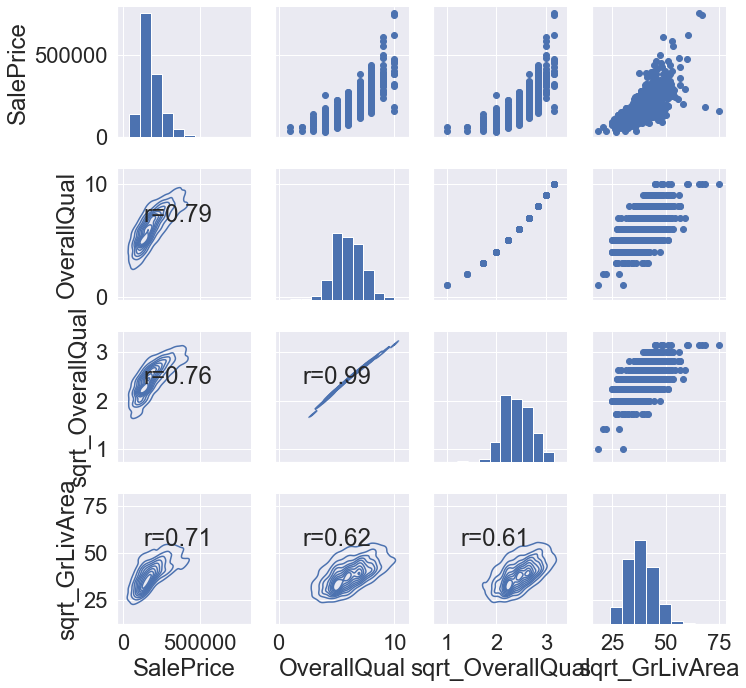

In [50]:
columns = ["SalePrice", "OverallQual", "sqrt_OverallQual","sqrt_GrLivArea"]
plot_data = train_new[columns]

figsize(12,12)
def r_funct(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("r={:.2}".format(r), xy=(0.2,0.6), xycoords = ax.transAxes)

plot = sns.PairGrid(plot_data)
plot.map_upper(plt.scatter)
plot.map_diag(plt.hist)
plot.map_lower(r_funct)
plot.map_lower(sns.kdeplot)
plt.show()

While variables in a dataset are usually correlated to a small degree, highly collinear variables can be redundant in the sense that we only need to retain one of the features to give our model the necessary information.

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization. It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score.

In [51]:
# Collinear removing Function
def remove_colinear(x, x_test,  threshold):
    y = x["SalePrice"]
    x = x.drop("SalePrice",1)
    cor_ = x.corr()
    drop_cols = []
    cols = list(cor_.columns)
    cols = range(len(cols)-1)
    for i in list(cols):
        for j in range(i):
            item = cor_.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= threshold:
                drop_cols.append(col.values[0])
    drops = set(drop_cols)
    x = x.drop(columns = drops, axis=1)
    x["SalePrice"]=y
    x_test = x_test.drop(columns=drops,axis =1)
    return x, x_test

In [52]:
# Data after removing the collinerity
train_new, test_new = remove_colinear(train_new,test_new,0.6)

In [53]:
print(test_new.shape)
print(train_new.shape)

(1459, 81)
(1168, 82)


In [54]:
# Remove any columns with all na values
train_new  = train_new.dropna(axis=1, how = 'all')
test_new  = test_new.dropna(axis=1, how = 'all')

print(test_new.shape)
print(train_new.shape)

(1459, 81)
(1168, 82)


# Split Into Training and Testing Sets

In [55]:
no_score = train_new[train_new['SalePrice'].isna()]
score = train_new[train_new['SalePrice'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 82)
(1168, 82)


In [56]:
features = train_new.drop("SalePrice", axis=1)
targets = train_new["SalePrice"]

In [57]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(features,targets, test_size=0.3, random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(817, 81)
(351, 81)
(817,)
(351,)


# Establishing a Baseline

It's important to establish a naive baseline before we beginning making machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. This could be because we are not using the right models, because we need more data, or because there is a simpler solution that does not require machine learning. Establishing a baseline is crucial so we do not end up building a machine learning model only to realize we can't actually solve the problem.

For a regression task, a good naive baseline is to predict the median value of the target on the training set for all examples on the test set. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach.

In [58]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


baseline_guess = np.median(y)

print("The baseline guess is a score of", baseline_guess)
print("The baseline performance on the test set: root mean squared error =", rmse(y_test,baseline_guess))

The baseline guess is a score of 162900.0
The baseline performance on the test set: root mean squared error = 84371.36016430195


# Step:4 Evaluating and Comparing Machine Learning Models

In this section we will build, train, and evalute several machine learning methods for our supervised regression task. The objective is to determine which model holds the most promise for further development (such as hyperparameter tuning).

# Imputing Missing Values

Standard machine learning models cannot deal with missing values, and which means we have to find a way to fill these in or disard any features with missing values. Since we already removed features with more than 40% missing values in the first part, here we will focus on filling in these missing values, a process known as imputation.

There are a number of methods for imputation but here we will use the relatively simple method of replacing missing values with the median of the column.

In [59]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(X,y)
X= imputer.transform(X)
X_test= imputer.transform(X_test)
test_new = imputer.transform(test_new)

In [60]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

print('Missing values in test_new features:  ', np.sum(np.isnan(test_new)))

Missing values in training features:  0
Missing values in testing features:   0
Missing values in test_new features:   0


In [61]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

print(np.where(~np.isfinite(test_new)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


# Scaling Feature

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm.It is a best practice to scale features when we are comparing multiple algorithms.

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))
scaler.fit(X,y)

X = scaler.transform(X)
X_test = scaler.transform(X_test)

test_new = scaler.transform(test_new)

In [63]:
# Convert y and y_test to one-dimensional array (vector)
y = np.array(y).reshape((-1,))
y_test = np.array(y_test).reshape((-1,))

# Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

In [100]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [106]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = .100,random_state = i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")
    

At random state 0,the training accuracy is:- 0.8456207841337972
At random state 0,the testing accuracy is:- 0.8598860246522587


At random state 1,the training accuracy is:- 0.8487444077248097
At random state 1,the testing accuracy is:- -227953618067.3167


At random state 2,the training accuracy is:- 0.8630226253156035
At random state 2,the testing accuracy is:- 0.7768240479999824


At random state 3,the training accuracy is:- 0.8550424339838523
At random state 3,the testing accuracy is:- 0.8058061258053245


At random state 4,the training accuracy is:- 0.8518574074690186
At random state 4,the testing accuracy is:- 0.8518777630883664


At random state 5,the training accuracy is:- 0.8551736664745421
At random state 5,the testing accuracy is:- 0.8151007879151865


At random state 6,the training accuracy is:- 0.8520849137752855
At random state 6,the testing accuracy is:- 0.83799538679037


At random state 7,the training accuracy is:- 0.8593177804958158
At random state 7,the testing accur

In [102]:
maxAcc=0
MaxRs=0
for i in range(1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.100,random_state=i)
    lr.fit(X_train,y_train)
    pred_test=lr.predict(X_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxAcc:
        maxAcc=acc
        MaxRs=i
print("Best Accuracy is",maxAcc,"on random state", MaxRs)

Best Accuracy is 0.905028213174388 on random state 58


In [103]:
def models(X_train, y_train):
    from sklearn.linear_model import LogisticRegression

    lr = LinearRegression(random_state = 58)
    lr.fit(X_train, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p =2)
    knn.fit(X_train, y_train)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 58)
    svc_lin.fit(X_train, y_train)

    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 58)
    svc_rbf.fit(X_train, y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =58)
    tree.fit(X_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=58)
    forest.fit(X_train,y_train)

    print('[0]Linear Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    print('[5]Decision Tree Classsifier Training Accuracy:', tree.score(X_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [104]:
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.38639455782312926
[1]K Nearest Neighbor Training Accuracy: 0.19047619047619047
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.6517006802721088
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.04081632653061224
[4]Gaussian Naive Bayes Training Accuracy: 0.8598639455782313
[5]Decision Tree Classsifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9959183673469387


In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=58)

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [110]:
y_pred=rf_reg.predict(X_test)

In [111]:
rf_reg.score(X_train,y_train)

0.9759432069900191

In [112]:
rf_reg.score(X_test,y_test)

0.7168432126212954

In [113]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 21244.01638211382
MSE: 1550735882.6927252
RMSE: 39379.3839806151


In [114]:
metrics.r2_score(y_test,y_pred)

0.7168432126212954

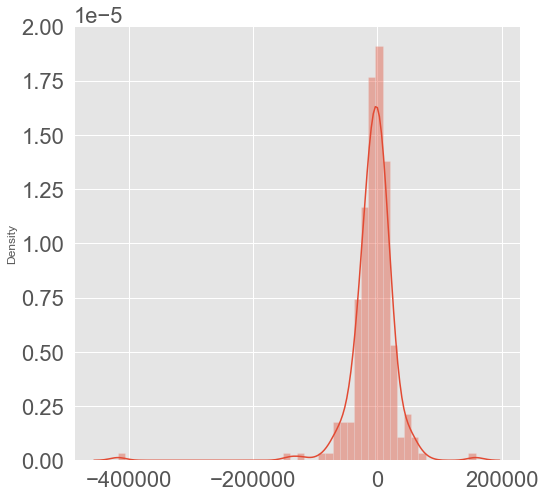

In [115]:
sns.distplot(y_test-y_pred)
plt.show()

# Cross-Validation of the model:

<function matplotlib.pyplot.show(close=None, block=None)>

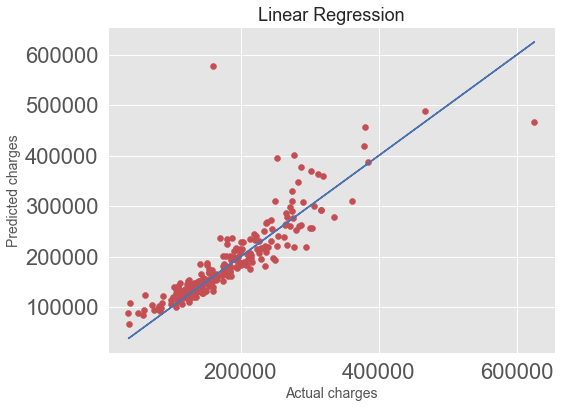

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show

# Regularization

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [118]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [119]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(X_train,y_train)
ls_score_training=ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)
ls_score_training*100

90.23135513064744

In [120]:
lss=r2_score(y_test,pred_ls)
lss*100

44.42655042988759

In [121]:
cv_score=cross_val_score(ls,X,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

69.02677829033817

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [123]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(X_train, y_train)
rf.score(X_train, y_train)
pred_decision = rf.predict(X_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 Score: 73.54587242905232
Cross Val Score: 81.79458090932728


# Conclusion

In [124]:
import pickle
filename='House_price.pkl'
pickle.dump(rf,open(filename,'wb'))

In [125]:
import pickle
loaded_model=pickle.load(open('House_price.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

73.54587242905232


In [126]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=["Predicted","original"])

In [127]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
Predicted,143815.5,187429.1,187882.5,164090.26,485918.08,167573.28,128080.09,172872.4,197544.38,195370.8,...,165599.16,157000.8,124593.87,245480.32,132624.08,138358.8,146728.02,93765.26,220929.78,146938.5
original,143815.5,187429.1,187882.5,164090.26,485918.08,167573.28,128080.09,172872.4,197544.38,195370.8,...,165599.16,157000.8,124593.87,245480.32,132624.08,138358.8,146728.02,93765.26,220929.78,146938.5


After training or testing the model with different Classifier the Highest accuracy is given by RandomForest Classifier That is 73%. And we do Cross validation, the Model gives 81% score for cross validation.